<a href="https://colab.research.google.com/github/NihilisticMotif/Linear-Regression-Tutorial/blob/main/Algo_LinearRegression_with_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction of Linear Regression

In statistics, linear regression is a linear approach for modelling the relationship between multiple variables. This tutorial demonstrate the simplest linear regression model.

The data of this tutorial contains column X (X_Grade) and Y (Y_Grade).

In order to perform linear regression, it is important to do 5 steps
1. Getting Data
2. Initializing Variable (Hypothesis function)
3. Creating Evaluating Function (Square Error function)
4. Creating Optimizing Evaluating Function (Gradient Descent function)

Here is the source of this data: https://youtu.be/BOhgGA7Eu5E

###Step 1, Getting Data

In [ ]:
!pip install --upgrade -q gspread

     |████████████████████████████████| 40 kB 1.4 MB/s 


In [ ]:
# import

from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sympy as smp
from sympy import *

from IPython.display import clear_output
from six.moves import urllib

import tensorflow as tf
from IPython.display import display, Latex

# Connect Google Collab with Google Sheet

from google.colab import auth
import gspread
from google.auth import default
from google.colab import data_table

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('student-mat').get_worksheet(0)
rows = worksheet.get_all_values()
dfmain = pd.DataFrame(rows)

# Display Data form Google Sheet

dfmain.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15


In [ ]:
# Select only 2 column (G1 and G2)

for i in range(33):
  if i==30 or i==31:
    continue
  else:
    del dfmain[i]

dfmain.head()

,30,31
0,G1,G2
1,5,6
2,5,5
3,7,8
4,15,14


In [ ]:
# Drop first row
dfM=dfmain.drop([0], axis=0)

# Rename column
dfM.rename(columns={30:'X_Grade1',31:'Y_Grade2'},inplace=True)

# Change Data Type form String to Integer
dfM=dfM.astype(int)

# Display Data
dfM.head()

# reference: https://stackoverflow.com/questions/64932538/pandas-attribute-error-nonetype-has-no-attribute-rename

,X_Grade1,Y_Grade2
1,5,6
2,5,5
3,7,8
4,15,14
5,6,10


In [ ]:
# How to access one value in Data Frame?
# reference: https://stackoverflow.com/questions/50158333/how-do-i-enforce-a-square-grid-in-matplotlib

###Step 2, Initializing Variable

Linear regression is a machine learning model which is used for predicting the relationship between value x and value y, based on the given data on the graph.

In this case, the linear regression is displayed as $h_0 + x_1*h1$
where $h(x)$ = hypothesis function

The goal is to measure and optimize the accuracy of $h()$ function.

List of initial Variable
* $x_i$ = input No.i = feature No.i
* $y_i$ = output No.i = label No.i
* $m$ = number of all training examples 
* $(x_i, y_i)$ = training example 
* $(x_i, y_i){i=1,...,m}$ = training set
* space = set = array = vector = matrix = tensor = list (*** There is a minor * difference between those terms.)
* $X$ = set of input values
* $Y$ = set of output values


* $h(x)$ = hypothesis function = $x^0h_0 + x^1 h_1 + x^2h_2 +... + x^nh_n$
* $h_{ci}$ = constant of hypothesis function No.i


In [ ]:
for i in range(3):
    display(Latex('$x_{i}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
def f(x): return 2*x+1 # f(x)=2x+1
display(Latex("$x_1 = "+str(dfM.iat[0,0])+'$'))
display(Latex("$y_3 = "+str(dfM.iat[3,1])+'$'))
display(Latex("$m = "+str(dfM.shape[0])+'$'))
print("\nThis is a set X\n"+str(dfM['X_Grade1']))
print("\nThis is a set Y\n"+str(dfM['Y_Grade2']))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


This is a set X
1       5
2       5
3       7
4      15
5       6
       ..
391     9
392    14
393    10
394    11
395     8
Name: X_Grade1, Length: 395, dtype: int64

This is a set Y
1       6
2       5
3       8
4      14
5      10
       ..
391     9
392    16
393     8
394    12
395     9
Name: Y_Grade2, Length: 395, dtype: int64


Note

$xi \neq x*i$

$xi = x_i$

$x*i = x * \sqrt{-1} = i * x = i(x)$

$x3 \neq x*3$

$x3 = x_3$

$x*3 = 3x = 3*x = 3(x)$


Here is the graph based on the data.

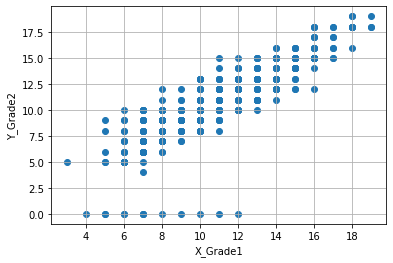

In [ ]:
# How do I enforce a square grid in matplotlib? reference: https://stackoverflow.com/questions/50158333/how-do-i-enforce-a-square-grid-in-matplotlib
plt.grid()

# Add labels to the x- and y-axis.
plt.xlabel('X_Grade1')
plt.ylabel('Y_Grade2')

# Data is plotted.
plt.scatter(dfM['X_Grade1'],dfM['Y_Grade2'])

###Step 3A, Creating Evaluating Function

accuracy of hypothesis function = $J(h_{c0},h_{c1})=\frac{1}{2m}\sum_{i=1}^m(h(x_i)-y_i)^2$

error = $h(x_i) - y_i$

mean(X) = average(X) = $\frac{1}{m}\sum_{i=1}^mx_i$

Cost Function (Squared error function) is used for evaluate accuracy of h() function.

Warning: $m$ = number of all training example.

Q: Why $\frac{1}{2m}$ ?

Q: Why do we have to divide by 2 in the ML squared error cost function?

A: It is because when you take the derivative of the cost function, that is used in updating the parameters during gradient descent, that 2 in the power get canceled with the 1/2 multiplier, thus the derivation is cleaner. (https://datascience.stackexchange.com/questions/52157/why-do-we-have-to-divide-by-2-in-the-ml-squared-error-cost-function)


Q: Why $(...)^2$  ? 

Q: Why is a square mean error used instead of taking its absolute value? Both are removed negatives, but why is the mean squared error so widely used?

A: By squaring the errors we are ignoring the effect of sign $(+ -)$.
The contribution of larger errors to the sum of errors becomes more compared to small errors.
(https://www.quora.com/Why-is-a-square-mean-error-used-instead-of-taking-its-absolute-value-Both-are-removed-negatives-but-why-is-the-mean-squared-error-so-widely-used)


###Step 3B, Visualize Evaluating Function

Note
1. Vector is 1 rank Tensor. $\implies$ Vector.shape() = (m, 1)
2. Matrix is 2 rank Tensor. $\implies$ Matrix.shape() = (m, n)

Here is how to visualize 2D hyperplane in 3D space.

(50,)
(50, 50)


Text(0.5, 0, 'Z')

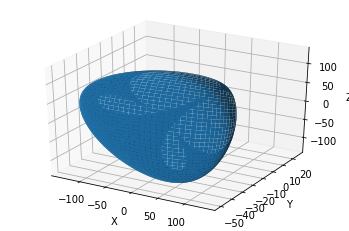

In [ ]:
def function_z(x, y):
    return 50 - (x**2 + y**2)
N = 50
M = 50
# Displaying size of Matrix = .shape

# x_values \in [-5,5], |x_values|=N, x_value is N*1 size matrix
x_values = np.linspace(-5, 5, N)
# y_values \in [-5,5], |y_values|=50, y_value is M*1 size matrix
y_values = np.linspace(-5, 5, M)

# X and Y is M*N size matrix
# This is X Matrix.
# (X_{1,1}) (X_{1,2}) ... (X_{1,N})
# (X_{2,1}) (X_{2,2}) ... (X_{2,N})
# ...       ...       ... ...
# (X_{M,1}) (X_{M,2}) ... (X_{M,N})

# This is X,Y Machining Matrix. This Matrix is used for creating 2D grid.
# (X_{1,1},Y_{1,1}) (X_{1,2},Y_{1,2}) ... (X_{1,N},Y_{1,N})
# (X_{2,1},Y_{2,1}) (X_{2,2},Y_{2,2}) ... (X_{2,N},Y_{2,N})
# ...               ...               ... ...
# (X_{M,1},Y_{M,1}) (X_{M,2},Y_{M,2}) ... (X_{M,N},Y_{M,N})

# (X_{i,j},Y_{i,j}) = Data point in 2D cartesian plane.

# ax.plot_surface(X,Y,Z). This Matrix is used for creating 3D grid.
# (X_{1,1},Y_{1,1},Z_{1,1}) (X_{1,2},Y_{1,2},Z_{1,2}) ... (X_{1,N},Y_{1,N},Z_{1,N})
# (X_{2,1},Y_{2,1},Z_{2,1}) (X_{2,2},Y_{2,2},Z_{2,2}) ... (X_{2,N},Y_{2,N},Z_{2,N})
# ...                       ...                       ... ...
# (X_{M,1},Y_{M,1},Z_{2,1}) (X_{M,2},Y_{M,2},Z_{2,1}) ... (X_{M,N},Y_{M,N},Z_{2,1})

# (X_{i,j},Y_{i,j},Z_{i,j}) = Data point in 3D cartesian plane.
# reference: https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy
X, Y = np.meshgrid(x_values, y_values)

# Z is M*N size matrix
Z = function_z(X, Y)
print(x_values.shape)
print(Y.shape)

# Plotting 3D Data.
ax = plt.axes(projection='3d')
ax.plot_surface(Z*X-Y,X*Y-Z,Y*Z-X);

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# code source: https://github.com/kimfetti/Videos/blob/master/Matplotlib_Tips/12_3Dplots.ipynb

Here is 3D visualization of Squared Error function

Text(0.5, 0, 'SquareError')

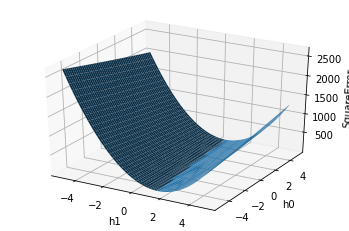

In [ ]:
# import graph library
#import math
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure

def SquareErrorMean(m,c):
    # size of training data = dfM.shape[0]
    # x_i = dfM.iat[i,0]
    # y_i = dfM.iat[i,1]
    sigma =0
    for i in range(dfM.shape[0]):
      sigma +=pow((dfM.iat[i,0]*m+c-dfM.iat[i,1]),2)
    return (1/(2*dfM.shape[0]))*sigma

N = 50
M = 50

x_values = np.linspace(-5, 5, N)
y_values = np.linspace(-5, 5, M)
X, Y = np.meshgrid(x_values, y_values)
Z = SquareErrorMean(X, Y)

# Plotting 3D Data.
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z);

ax.set_xlabel('h1')
ax.set_ylabel('h0')
ax.set_zlabel('SquareError')
#ax.view_init(0, 90);
# reference: https://youtu.be/gqoLLGgbeAE

Here is the 2d visualization of hc0 and Error.

###Step 4, Creating Optimizing Evaluating Function

Gradient Descent is used for optimize Square Error Function.

$h_{i} := h_{i}-a*J'(h_{i})$

$h_{0} := h_{0}-a*J'(h_{0})$

$h_{1}:=h_{1}-a*J'(h_{1})$

accuracy of hypothesis function = $J(h_{i})$

slope of of accuracy = changing rate of accuracy = $J'(h_{i})$

$a$ = learning rate

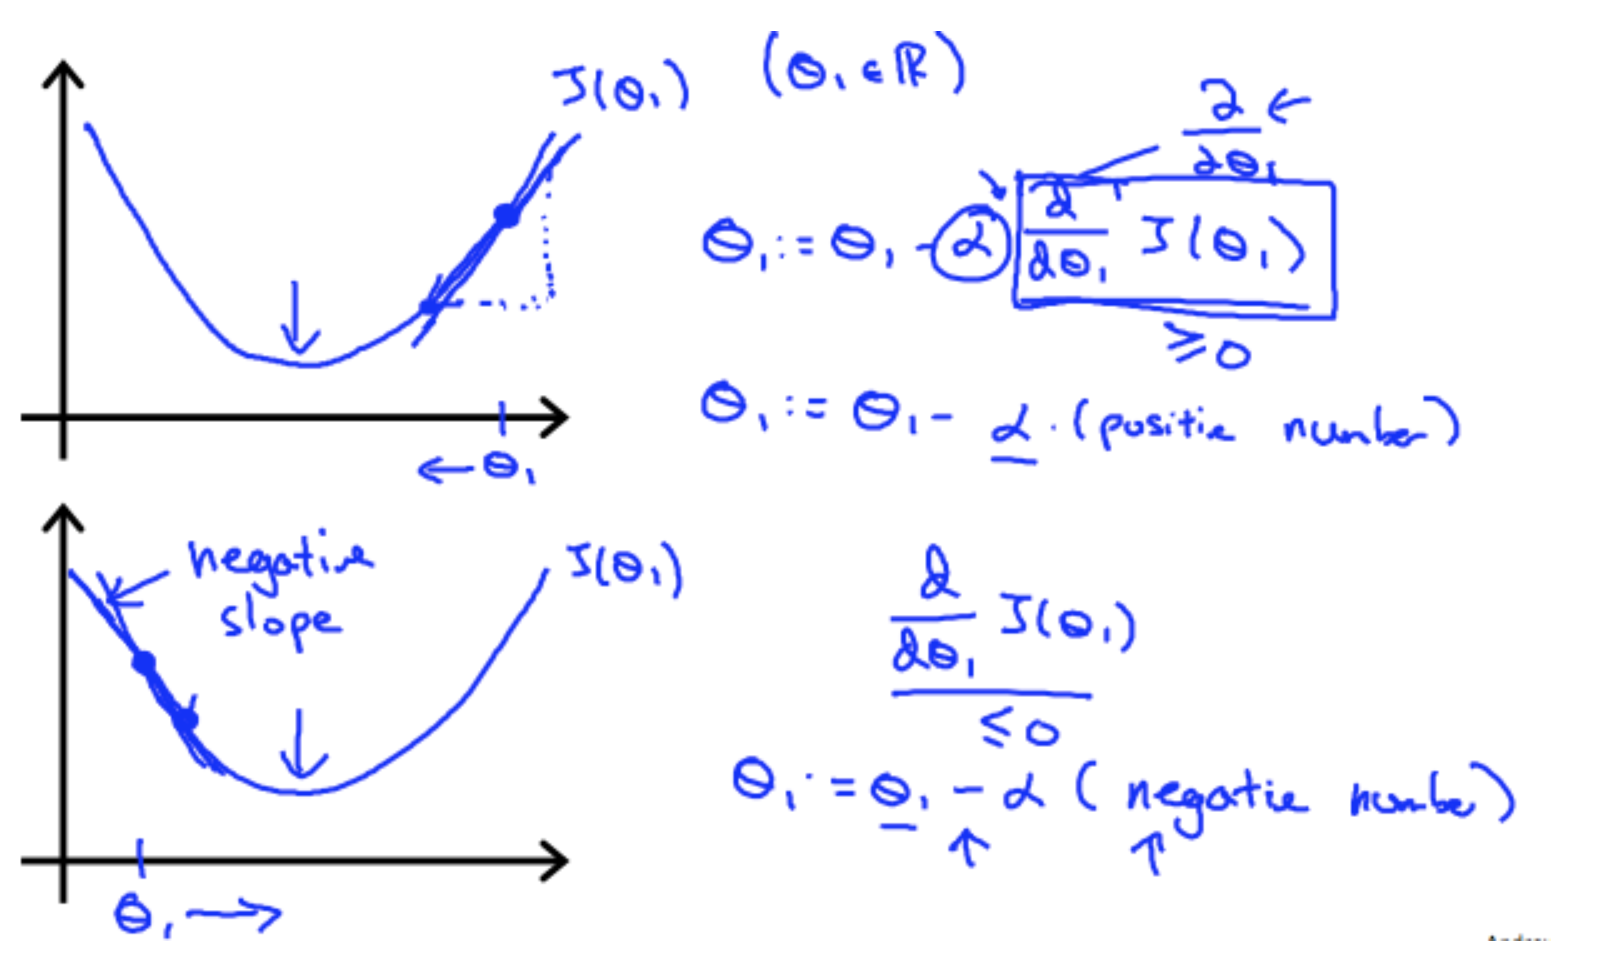

Q: Why $-a*J'(h_{i})$?

A: 

When value of $h_{i} < $ minimum point $J'(h_{i})<0 \implies -a*J'(h_{i})>0$

$\therefore h_{i}:=h_{i}-a*J'(h_{i})$ increase the value of $h_{i}$ to equal to minimum error point.

When value of $h_{i} > $ minimum point $J'(h_{i})>0 \implies -a*J'(h_{i})<0$

$\therefore h_{i}:=h_{i}-a*J'(h_{i})$ decrease the value of $h_i$ to equal to minimum error point.

Q: How to find $J'(h_{i})$ of $J(h_{i})=\frac{1}{2m}\sum_{i=1}^m(h(x_i)-y_i)^2$?

A:

The value of $J(h_{0},h_{1})$ is $J(h_{i})=\frac{1}{2m}\sum_{i=1}^m(h(x_i)-y_i)^2 = \frac{1}{2m}(h(x_1)-y_1)^2+(h(x_2)-y_2)^2+...+(h(x_m)-y_m)^2)$

According to Partial Derivative: $\frac{\partial }{\partial x}f_x(x,y,...) = \lim_{h\to 0} \frac{f(x+h,y,...)-f(x,y,...)}{h}$

$\therefore \frac{\partial }{\partial h_{0}}J(h_{0},h_{1}) = \lim_{h\to 0} \frac{J(h_{0}+h,h_{1})-J(h_{0},h_{1})}{h}$

and

$\therefore \frac{\partial }{\partial h_{1}}J(h_{0},h_{1}) = \lim_{h\to 0} \frac{J(h_{0},h_{1}+h)-J(h_{0},h_{1})}{h}$

**1. Finding $\frac{\partial }{\partial h_{0}}J(h_{0},h_{1})$:**

$\frac{\partial }{\partial h_{0}}J(h_{0},h_{1})=\frac{\partial }{\partial h_{0}}(\frac{1}{2m}(h(x_1)-y_1)^2+(h(x_2)-y_2)^2+...+(h(x_m)-y_m)^2)$

According to Constant multiple rule: $\frac{d}{dx}[k*f(x)] = k*\frac{d}{dx}f(x)$

$=\frac{1}{2m}*\frac{\partial }{\partial h_{0}}((h(x_1)-y_1)^2+...+(h(x_m)-y_m)^2)$

According to Sum Rule: $\frac{d}{dx}[f(x)+g(x)] = \frac{d}{dx}f(x)+\frac{d}{dx}g(x)$

$=\frac{1}{2m}*(\frac{\partial }{\partial h_{0}}[(h(x_1)-y_1)^2]+...+\frac{\partial }{\partial h_{0}}[(h(x_m)-y_m)^2)])$

According to Chain Rule: $\frac{d}{dx}[f(g(x))] = (f\circ g)'= f'(g(x))*g'(x)$ also $y_i\in$ constant

$=\frac{1}{2m}*(2*h(x_1)\frac{\partial }{\partial h_{0}}[(h(x_1)]+...+2*h(x_m)\frac{\partial }{\partial h_{0}}[(h(x_m)])$

$=\frac{1}{m}*(h(x_1)\frac{\partial }{\partial h_{0}}[(h(x_1)]+...+h(x_m)\frac{\partial }{\partial h_{0}}[(h(x_m)])$

$=\frac{1}{m}*(h(x_1)\frac{\partial }{\partial h_{0}}[h_1x_1+h_0]+...+h(x_m)\frac{\partial }{\partial h_{0}}[h_1x_m+h_0])$

$=\frac{1}{m}*((h_1x_1+h_0-y_1)(0+1+0)+...+(h_1x_m+h_0)(0+1+0))$

$=\frac{(h_1x_1+h_0)+...+(h_1x_m+h_0)}{m}*$

$=\frac{1}{m}*\Sigma_{i=0}^m{h_1x_i+h_0}$

$=\frac{\Sigma_{i=0}^m{h_1x_i+h_0}}{m}$


**2. Finding $\frac{\partial }{\partial h_{1}}J(h_{0},h_{1})$:**

$\frac{\partial }{\partial h_{1}}J(h_{0},h_{1})=\frac{1}{m}*(h(x_1)\frac{\partial }{\partial h_{1}}[(h(x_1)]+...+h(x_m)\frac{\partial }{\partial h_{1}}[(h(x_m)])$

$\frac{\partial }{\partial h_{1}}J(h_{0},h_{1})=\frac{1}{m}*(h(x_1)*x_1+...+h(x_m)*x_m)$

$\frac{\partial }{\partial h_{1}}J(h_{0},h_{1})=\frac{1}{m}*\Sigma_{i=0}^mh(x_i)*x_i$

reference:
* https://youtu.be/hZAS9ilEbEE
* https://math.stackexchange.com/questions/3089676/why-is-the-derivative-of-sigma-the-sum-of-its-derivatives
* https://www.reddit.com/r/learnmath/comments/2s9x0a/simple_calculus_derivative_of_sigma_notation/
* https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-2-new/ab-3-1a/a/chain-rule-review

This is Gradient Descent algorithmn.

In [ ]:
import numpy as np

# gradient = differential function of accuracy evaluating function = J'(x)
# start = initial vector of hypothesis function = h_i = [h_i[0],...h_i[len(h_i)]]
# learn_rate = learn_rate = a
# n_iter = iterrating time = n_iter
# tolerance = minimum error value of accuracy evaluating function = tolerance

def gradient_descent(
    gradient, start, learn_rate, n_iter=50, tolerance=1e-06
):
    vector = start
    # h_i = initial vector
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        # diff = -a*J'(h_i)
        if np.all(np.abs(diff) <= tolerance):
            # if |a*J'(h_i)|==very_small_inaccuracy: stop
            break
        vector += diff
        # h_i=h_i-a*J'(x)
    return vector
    # reference: https://realpython.com/gradient-descent-algorithm-python/#basic-gradient-descent-algorithm

v=gradient_descent(
    # gradient = J'(x)
    gradient=lambda v: 2 * v, start=10.0, learn_rate=0.2
)
print(v)

2.210739197207331e-06


This is Gradient Descent algorithmn for linear regression.

In [ ]:
# x = input x
# y = output y

def gradient_descent(
    gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06
):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * np.array(gradient(x, y, vector))
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector

def ssr_gradient(x, y, b):
    # ssr_gradient(x,y,b) return differential function of accuracy evaluating function = J'(x)
    res = b[1] * x + b[0] - y
    # res = J(x) = accuracy of h(x) = h_1*x+h_0-y
    return [res.mean(), (res * x).mean()]  # .mean() is a method of np.ndarray
    # [res.mean(), (res * x).mean()] = J'(x)

h_i=gradient_descent(
    ssr_gradient, dfM['X_Grade1'], dfM['Y_Grade2'], start=[0.5, 0.5], learn_rate=0.0008,
    n_iter=100_000
)
print(h_i)

[0.19445705 0.9644194 ]


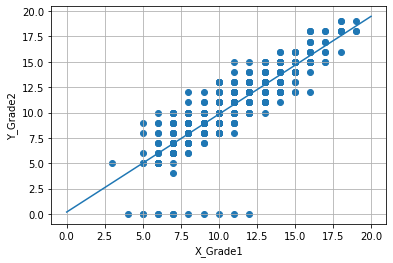

In [ ]:
# Here is the data.
# How do I enforce a square grid in matplotlib? reference: https://stackoverflow.com/questions/50158333/how-do-i-enforce-a-square-grid-in-matplotlib
plt.grid()

# Add labels to the x- and y-axis.
plt.xlabel('X_Grade1')
plt.ylabel('Y_Grade2')

# Data is plotted.
plt.scatter(dfM['X_Grade1'],dfM['Y_Grade2'])

# Here is the hypothesis function a.k.a. prediction function.
xpoints = np.array([0, 20])
ypoints = xpoints*h_i[1]+h_i[0]

plt.plot(xpoints, ypoints)
plt.show()

Alternative way to do linear regression

In [ ]:
npoly = np.polyfit(dfM['X_Grade1'], dfM['Y_Grade2'], 1)
print(npoly)

[0.96566981 0.17956659]


In [ ]:
# The result is very close.

print(h_i[1]-npoly[0])
print(h_i[0]-npoly[1])

-0.0012504032094124984
0.014890460010785228


###(Bonus No.1) $R^2$ indicates how well the data fit the regression model

**What is $R^2$?**

$R^2$ indicates how well the data fit the regression model (the goodness of fit). ($R^2$ have the similar purpose to Square Error Function, $J(h)$)

**Note that**
* Large $R^2$ does not guarantee good prediction. It is simply a measure of how well the model explains the variability in the observed data

**This is Square Error Function**
* $J(h_{0},h_{1})$ =$\frac{1}{2m}\sum_{i=1}^m(h(x_i)-y_i)^2$

**This is $R^2$**
* $R^2(y,h(x_{i}))=1-\frac{\Sigma_{i=1}^n(y_i-h(x_{i}))^2}{\Sigma_{i=1}^n(y_i-y_m)^2}\in[0,1]$

**Why $R^2(y,h(x_{i}))=1-\frac{\Sigma_{i=1}^n(y_i-h(x_{i}))^2}{\Sigma_{i=1}^n(y_i-y_m)^2}\in[0,1]$?**

**Why $\Sigma_{i=1}^n(y_i-h(x_{i}))^2$?**
* $\Sigma_{i=1}^n(y_i-h(x_{i}))^2=\Delta(y-h(x))^2$
* $\Sigma_{i=1}^n(y_i-h(x_{i}))^2=2m*J(h_0,h_1)=\sum_{i=1}^m(h(x_i)-y_i)^2$
* $\frac{1}{2m}$ is not useful because $R^2$ have nothing to do with derivative and gradient descent. Moreover $\frac{1}{2m}$ not suit with $R^2\in[0,1]$

**Why $\Sigma_{i=1}^n(y_i-y_m)^2$?**
* $\Sigma_{i=1}^n(y_i-y_m)^2=\Delta(y-y_m)^2$ indicates different between accual y-axis value and its average value.

**Prove that $0\leq R^2(y,h(x_{i}))=\frac{\Sigma_{i=1}^n(y_i-h(x_{i}))^2}{\Sigma_{i=1}^n(y_i-y_m)^2}\leq1$?**

**Why $1-r^2$?**

* Convert minimized error value into accura

reference:
* https://stats.stackexchange.com/questions/469654/why-must-the-r-squared-value-of-a-regression-be-less-than-1
* https://towardsdatascience.com/an-ode-to-r-squared-804d8d0ed22c
* https://youtu.be/bMccdk8EdGo

In [ ]:
def FindR2(m,c):
    # size of training data = dfM.shape[0]
    # x_i = dfM.iat[i,0]
    # y_i = dfM.iat[i,1]
    sigma =0
    for i in range(dfM.shape[0]):
      sigma +=pow((dfM.iat[i,0]*m+c-dfM.iat[i,1]),2)
    return sigma

R2=FindR2(h_i[1],h_i[0])/FindR2(0,dfM['Y_Grade2'].mean())

print("R^2 = "+str(1-R2))

R^2 = 0.7261038708895837


###Reference https://www.coursera.org/learn/machine-learning-course/lecture/db3jS/model-representation